In [1]:
import numpy as np
import os
import glob
import sys
import torch
from pathlib import Path

current_dir = os.path.dirname(os.path.abspath('__file__'))
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)
grandparent_dir = os.path.abspath(os.path.join(parent_dir, '..'))
sys.path.append(grandparent_dir)
print(grandparent_dir)

import gendata
import learner as ln
from learner.metric.dynamics_metric import (
    calculate_dynamics_metrics,
    plot_dynamics_metrics,
)
from utils import Logger, read_config_file, set_random_seed, tensors_to_numpy

/home/lbu/project/PINN_DE


In [2]:
from configs.config_plot import *

seed = 0
set_random_seed(seed)

os.makedirs(output_dir, exist_ok=True)  

# Logger
logger = Logger(output_dir)
logger.info("#" * 100)

2023-09-09 18:59:07 INFO ####################################################################################################


# infer

In [3]:
# ##################################################################
# #
# # load data and net
# #
# ##################################################################
# # sp ----------------------------------------------------------------------------------------
# # config_file_path = "/home/lbu/project/PINN_DE/configs/train/sp/config_pinn.py"
# # config = read_config_file(config_file_path)
# # config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicSinglePendulumDAE"
# # config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_singlependlum_pinn/train-model.pkl"

# # dp ----------------------------------------------------------------------------------------
# # config_file_path = "/home/lbu/project/PINN_DE/configs/train/dp/config_pinn.py"
# # config = read_config_file(config_file_path)
# # config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicDoublePendulumDAE"
# # config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_doublependlum_pinn/train-model.pkl"

# # slider_crank ----------------------------------------------------------------------------------------
# # config_file_path = "/home/lbu/project/PINN_DE/configs/train/slider_crank/config_pinn.py"
# # config = read_config_file(config_file_path)
# # config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicSliderCrankDAE"
# # config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_slider_crank_pinn/train-model.pkl"

# # config_file_path = "/home/lbu/project/PINN_DE/configs/train/slider_crank/config_pirnn.py"
# # config = read_config_file(config_file_path)
# # config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicSliderCrankDAE"
# # config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_slider_crank_pirnn/train-model.pkl"

# # two_link ----------------------------------------------------------------------------------------
# # config_file_path = "/home/lbu/project/PINN_DE/configs/train/two_link/config_pinn.py"
# # config = read_config_file(config_file_path)
# # config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicTwoLinkDAE"
# # config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_TwoLink_pinn/train-model.pkl"

# # two_link ----------------------------------------------------------------------------------------
# config_file_path = "/home/lbu/project/PINN_DE/configs/train/scissor_space_deployable/config_pinn.py"
# config = read_config_file(config_file_path)
# config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicScissorSpaceDeployableDAE"
# config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_scissor_space_deployable_pinn/train-model.pkl"

# data_args = {
#     "config": config,
#     "logger": logger,
# }
# data = ln.data.get_data(**data_args)
# train_loader, val_loader = data
# y0, y, yt, data_t, physics_t = next(iter(val_loader))

# t0=0
# t1=6
# dt=0.001
# t = np.arange(t0, t1 + dt, dt)
# data_t = torch.tensor(t, device=config.device, dtype=config.dtype).requires_grad_(True)

# # Net 
# net_args = {
#     "config": config,
#     "logger": logger,
# }
# net = ln.nn.get_model(**net_args)
# q_hat, qt_hat, qtt_hat = net.get_q_qt_qtt(data_t)

# ##################################################################
# #
# # Calculate the error
# #
# ##################################################################
# # to numpy 
# data_t = tensors_to_numpy(data_t)
# q, qt = np.split(y, 2, axis=-1)
# qt, qtt = np.split(yt, 2, axis=-1)
# q, qt, qtt = tensors_to_numpy(q, qt, qtt)
# all_states = np.concatenate([q, qt, qtt], axis=-1)

# q_hat, qt_hat, qtt_hat = tensors_to_numpy(q_hat, qt_hat, qtt_hat)
# all_states_hat = np.concatenate([q_hat, qt_hat, qtt_hat], axis=-1)

# # Calculate energy and other terms using the physics model
# (
#     metric_value,
#     metric_error_value,
#     output_log_string,
# ) = calculate_dynamics_metrics(
#     calculator=net.right_term_net.calculator,
#     pred_data=[q_hat, qt_hat, qtt_hat],
#     gt_data=[q, qt, qtt],
# )

# energy, kinetic, potential, phi, phi_t, phi_tt = metric_value
# mean_energy_error, max_energy_error, phi_error, phi_t_error, phi_tt_error = metric_error_value
# output_metric = " | ".join(output_log_string)
# logger.info(output_metric)

In [17]:
##################################################################
#
# load data and net
#
##################################################################
# sp ----------------------------------------------------------------------------------------
# config_file_path = "/home/lbu/project/PINN_DE/configs/train/sp/config_pinn.py"
# config = read_config_file(config_file_path)
# config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicSinglePendulumDAE"
# config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_singlependlum_pinn/train-model.pkl"

# dp ----------------------------------------------------------------------------------------
# config_file_path = "/home/lbu/project/PINN_DE/configs/train/dp/config_pinn.py"
# config = read_config_file(config_file_path)
# config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicDoublePendulumDAE"
# config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_doublependlum_pinn/train-model.pkl"

# slider_crank ----------------------------------------------------------------------------------------
# config_file_path = "/home/lbu/project/PINN_DE/configs/train/slider_crank/config_pinn.py"
# config = read_config_file(config_file_path)
# config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicSliderCrankDAE"
# config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_slider_crank_pinn/train-model.pkl"

# config_file_path = "/home/lbu/project/PINN_DE/configs/train/slider_crank/config_pirnn.py"
# config = read_config_file(config_file_path)
# config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicSliderCrankDAE"
# config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_slider_crank_pirnn/train-model.pkl"

# two_link ----------------------------------------------------------------------------------------
# config_file_path = "/home/lbu/project/PINN_DE/configs/train/two_link/config_pinn.py"
# config = read_config_file(config_file_path)
# config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicTwoLinkDAE"
# config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_TwoLink_pinn/train-model.pkl"

# two_link ----------------------------------------------------------------------------------------
config_file_path = "/home/lbu/project/PINN_DE/configs/train/scissor_space_deployable/config_pinn.py"
config = read_config_file(config_file_path)
config.dataset_path = "/home/lbu/project/PINN_DE/outputs/data/DynamicScissorSpaceDeployableDAE"
config.load_net_path = "/home/lbu/project/PINN_DE/outputs/task_scissor_space_deployable_pinn/train-model.pkl"

data_args = {
    "config": config,
    "logger": logger,
}
data = ln.data.get_data(**data_args)
train_loader, val_loader = data
y0, y, yt, data_t, physics_t = next(iter(val_loader))

t0=0
t1=10.
# t1=10
dt=0.001
t = np.arange(t0, t1, dt)
data_t = torch.tensor(t, device=config.device, dtype=config.dtype).requires_grad_(True)

# Net 
net_args = {
    "config": config,
    "logger": logger,
}
net = ln.nn.get_model(**net_args)

import time
start_time = time.time()
q_hat_list = []
qt_hat_list = []
qtt_hat_list = []
for i in range(20):
    # split_len = 460
    split_len = 500
    tmp = data_t[i*split_len: (i+1)*split_len].clone().detach().requires_grad_(True)
    q_hat, qt_hat, qtt_hat = net.get_q_qt_qtt(tmp)
    q_hat_list.append(q_hat.clone().detach())
    qt_hat_list.append(qt_hat.clone().detach())
    qtt_hat_list.append(qtt_hat.clone().detach())

q_hat = torch.cat(q_hat_list, axis=0)
qt_hat = torch.cat(qt_hat_list, axis=0)
qtt_hat = torch.cat(qtt_hat_list, axis=0)

end_time = time.time()
execution_time = end_time - start_time
print(f"The running time of ODE solver: {execution_time} s")
##################################################################
#
# Calculate the error
#
##################################################################
# to numpy 
data_t = tensors_to_numpy(data_t)
q, qt = np.split(y, 2, axis=-1)
qt, qtt = np.split(yt, 2, axis=-1)
q, qt, qtt = tensors_to_numpy(q, qt, qtt)
all_states = np.concatenate([q, qt, qtt], axis=-1)

q_hat, qt_hat, qtt_hat = tensors_to_numpy(q_hat, qt_hat, qtt_hat)
all_states_hat = np.concatenate([q_hat, qt_hat, qtt_hat], axis=-1)

# Calculate energy and other terms using the physics model
(
    metric_value,
    metric_error_value,
    output_log_string,
) = calculate_dynamics_metrics(
    calculator=net.right_term_net.calculator,
    pred_data=[q_hat, qt_hat, qtt_hat],
    gt_data=[q, qt, qtt],
)

energy, kinetic, potential, phi, phi_t, phi_tt = metric_value
mean_energy_error, max_energy_error, phi_error, phi_t_error, phi_tt_error = metric_error_value
output_metric = " | ".join(output_log_string)
logger.info(output_metric)

2023-09-09 18:59:36 INFO =================>
2023-09-09 18:59:36 INFO Start get dataset...
2023-09-09 18:59:36 INFO Loading dataset from path: /home/lbu/project/PINN_DE/outputs/data/DynamicScissorSpaceDeployableDAE
2023-09-09 18:59:36 INFO DynamicData is loaded
2023-09-09 18:59:39 INFO =================>
2023-09-09 18:59:39 INFO Start get models...
2023-09-09 18:59:39 INFO PINN loaded
2023-09-09 18:59:39 INFO Number of parameters in model: 2740
2023-09-09 18:59:39 INFO Network loaded from '/home/lbu/project/PINN_DE/outputs/task_scissor_space_deployable_pinn/train-model.pkl'


Successfully loaded pretrained weights from "/home/lbu/project/PINN_DE/outputs/task_scissor_space_deployable_pinn/train-model.pkl"
The running time of ODE solver: 1.0722851753234863 s


2023-09-09 18:59:42 INFO Mean energy error: 6.4249e+05 | Max energy error: 5.4442e+03 | Phi error: 4.6158e-01 | Phi_t error: 3.6565e+00 | Phi_tt error: 4.8570e+01


In [18]:
len(q_hat)

10000

In [19]:
100/15

6.666666666666667

In [20]:
# plot_dynamics_metrics(
#     config=config,
#     pred_data=[q_hat, qt_hat, qtt_hat],
#     gt_data=[q, qt, qtt],
#     t=data_t,
# )

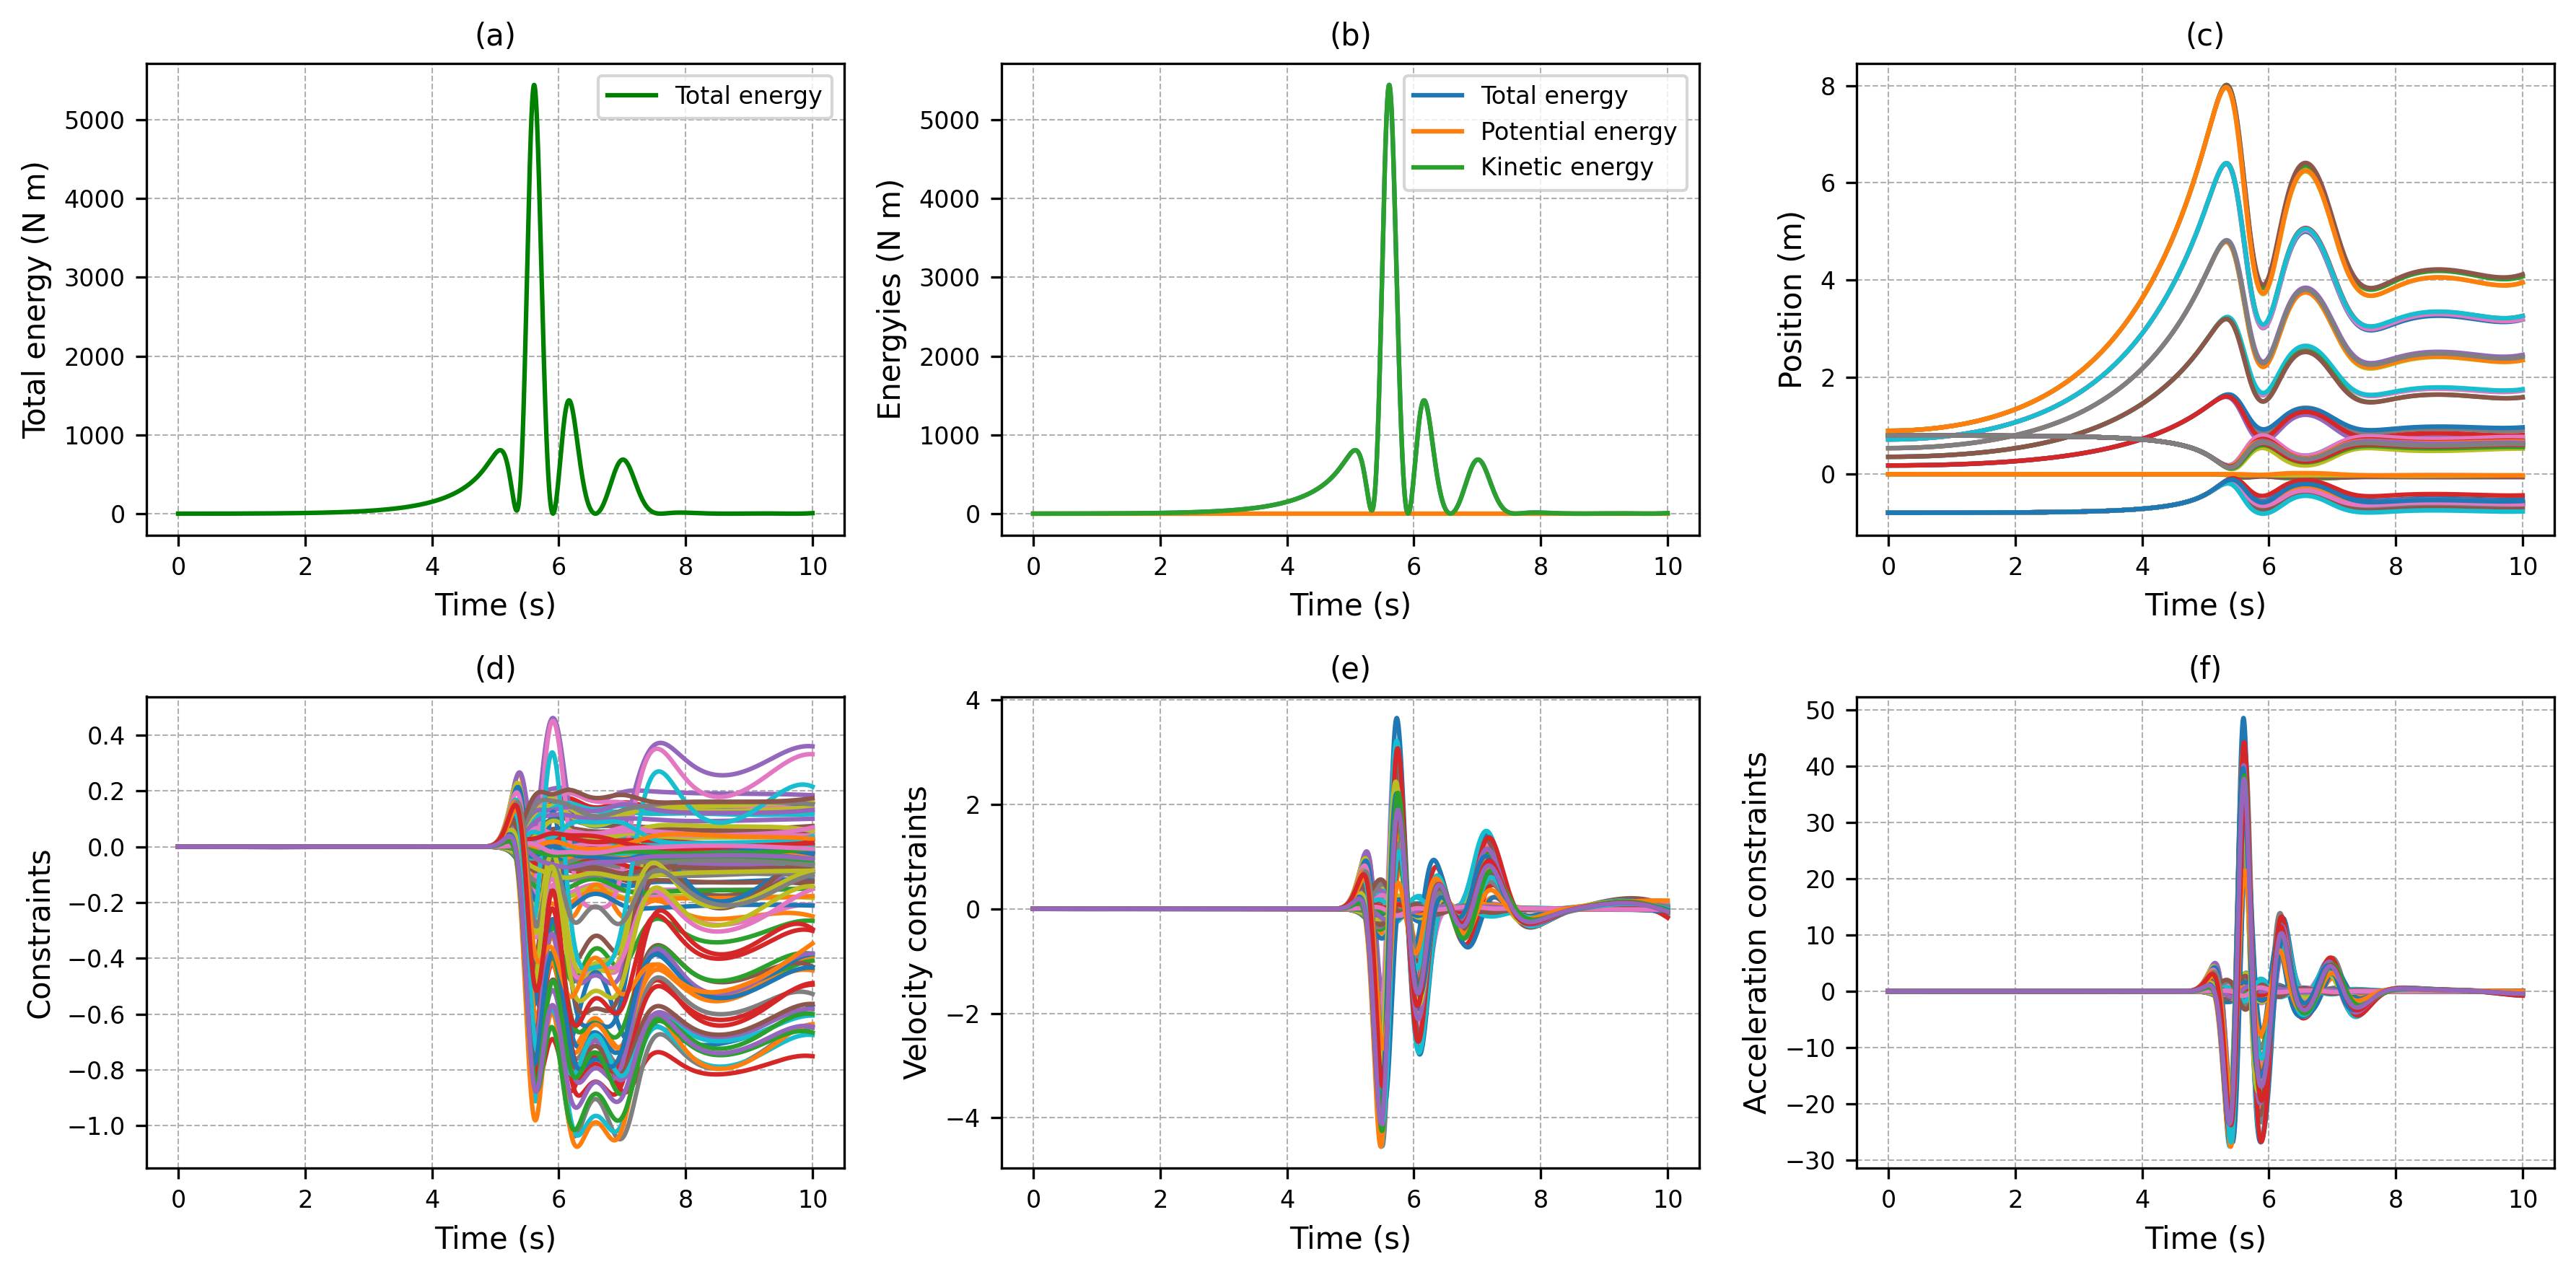

In [21]:
# fig, axs = plt.subplots(2, 3, figsize=(4 * 3, 3 * 2), dpi=DPI)
fig, axs = plt.subplots(2, 3, figsize=(4 * 3, 3 * 2), dpi=Latex_DPI)

subfig = axs[0, 0]
subfig.set_title('(a)')
subfig.set_xlabel('Time (s)')
subfig.set_ylabel('Total energy (N m)')
subfig.plot(data_t, energy, 'g-', label='Total energy')
subfig.legend()

subfig = axs[0, 1]
subfig.set_title('(b)')
subfig.set_xlabel('Time (s)')
subfig.set_ylabel('Energyies (N m)')
subfig.plot(data_t, energy, label='Total energy')
subfig.plot(data_t, potential, label='Potential energy')
subfig.plot(data_t, kinetic, label='Kinetic energy')
subfig.legend()

subfig = axs[0, 2]
subfig.set_title('(c)')
subfig.set_xlabel('Time (s)')
subfig.set_ylabel('Position (m)')
subfig.plot(data_t, q_hat[:,])
subfig.plot(data_t[:1], q_hat[:1, :1])

subfig = axs[1, 0]
subfig.set_title('(d)')
subfig.set_xlabel('Time (s)')
subfig.set_ylabel('Constraints')
subfig.plot(data_t, phi[:, ])

subfig = axs[1, 1]
subfig.set_title('(e)')
subfig.set_xlabel('Time (s)')
subfig.set_ylabel('Velocity constraints')
subfig.plot(data_t, phi_t[:, ])

subfig = axs[1, 2]
subfig.set_title('(f)')
subfig.set_xlabel('Time (s)')
subfig.set_ylabel('Acceleration constraints')
subfig.plot(data_t, phi_tt[:, ])

plt.tight_layout()

In [9]:
len(q_hat_list)

10